In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from nilmtk import DataSet
from nilmtk.utils import print_dict

In [2]:
data = DataSet('./iAWE.h5')

In [3]:
data = data.buildings[1].elec

In [4]:
df = next(data.mains().load())

Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.


In [22]:
df =df.drop(('current',),axis =1)

C:\Users\Faizan\anaconda3\envs\nilmtk-env\lib\site-packages\IPython\core\interactiveshell.py:2714: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


<AxesSubplot:>

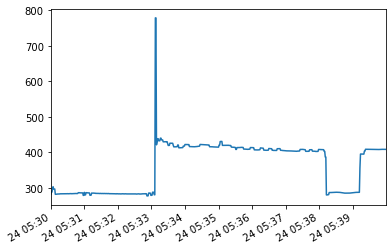

In [29]:
df[:600][('power','active')].plot()

<AxesSubplot:>

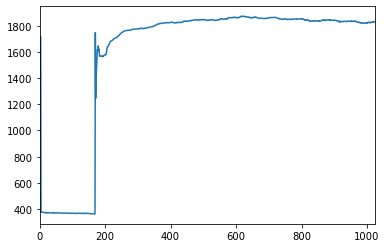

In [106]:
a = next(data['air conditioner'].load())[('power','active')][:1024]
j = a.to_numpy()
pd.Series(j).plot()

<AxesSubplot:>

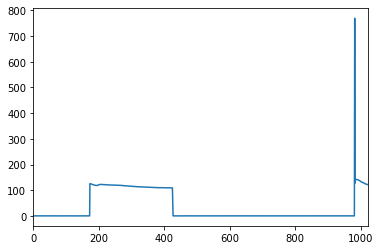

In [107]:
b = next(data['fridge'].load())[('power','active')][:1024]
k = b.to_numpy()
pd.Series(k).plot()

In [108]:
j[400:800] = j[400:800]+k[150:550]

<AxesSubplot:>

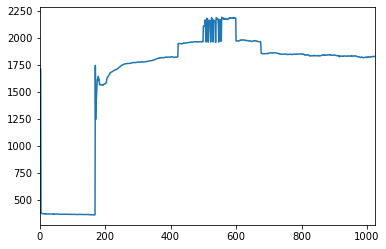

In [111]:
j[500:600] = j[500:600]+l[:100]
pd.Series(j).plot()

<AxesSubplot:>

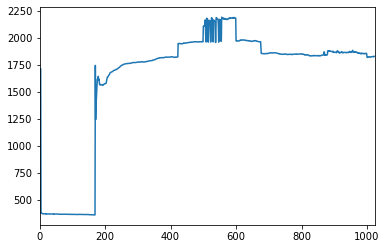

In [112]:
j[800:1000] = j[800:1000]+m[:200]
pd.Series(j).plot()

<AxesSubplot:>

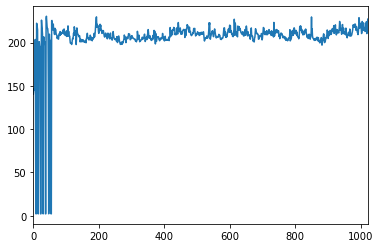

In [7]:
c = next(data['washing machine'].load())[('power','active')][:1024]
l = c.to_numpy()
pd.Series(l).plot()

<AxesSubplot:>

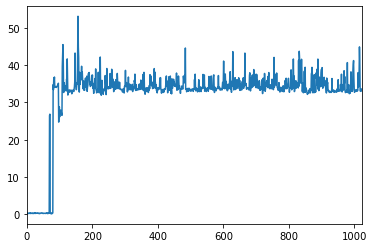

In [8]:
d = next(data['computer'].load())[('power','active')][:1024]
m = d.to_numpy()
pd.Series(m).plot()

In [88]:
import scipy
from scipy import signal
import matplotlib.pyplot as plt

<AxesSubplot:>

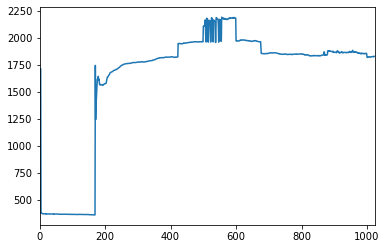

In [113]:
e = j
pd.Series(e).plot()

In [114]:
e = scipy.signal.medfilt(e, kernel_size=None)

<AxesSubplot:>

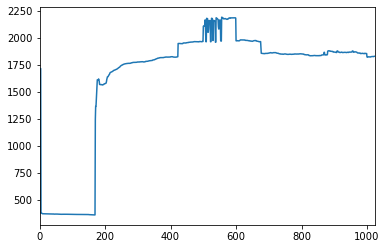

In [115]:
pd.Series(e).plot()

In [116]:
f,t,Zxx = scipy.signal.stft(e, fs=1.0, window='hamming', nperseg=10, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=- 1)

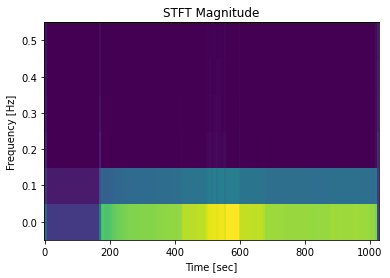

In [117]:
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [87]:
c.shape

(6, 206)

In [82]:
pd.Series(c).plot()

Exception: Data must be 1-dimensional

In [70]:
pd.Series((np.gradient(e))).plot()

ValueError: operands could not be broadcast together with shapes (6,206) (6,) 

<AxesSubplot:>

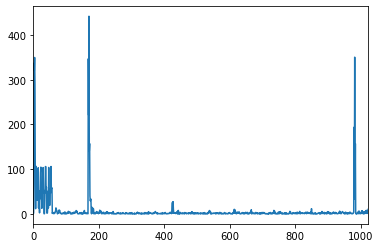

In [66]:
pd.Series((np.abs((np.gradient(np.gradient(e)))))).plot()


In [33]:
c = (np.abs((np.gradient(np.gradient(e)))))

In [30]:
e.size

1024

In [31]:
fft = scipy.fft.fft(e)

In [32]:
fft.size

1024

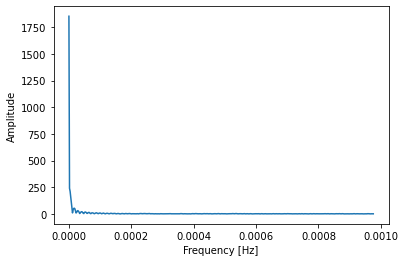

In [18]:
T = 512  # sampling interval 
N = e.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N)  # 1 / N is a normalization factor
plt.show()

In [22]:
xf = np.linspace(0.0,100,fft.shape[0])

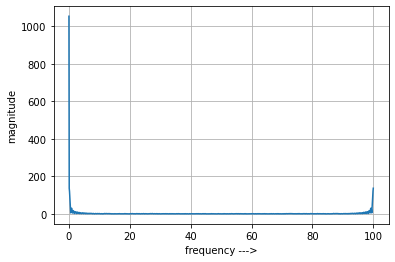

In [24]:
fig,ax = plt.subplots()
ax.plot(xf , 2.0/3600*np.abs(fft))
plt.grid()
plt.xlabel('frequency --->')
plt.ylabel('magnitude')
plt.show()

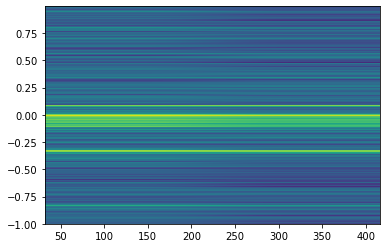

In [25]:
plt.specgram(fft,NFFT = 512);

In [28]:
size = e.size

In [57]:
counter = 0
li = []
loc = []
full = []
mean = 0
for x in range(1024):
    if counter <60:
        li.append(e[x]-mean)
        full.append(e[x]-mean)
        counter +=1
    elif counter == 60:
        li.pop(0)
        li.append(e[x]-mean)
        full.append(e[x]-mean)
        counter=0
        new_list = np.array(li)
        new_mean = np.mean(new_list)
        if e[x] >= (mean + 5):
            name =input('New Device turned ON. Name it:')
            loc.append(x)
        mean = new_mean
print (loc)

New Device turned ON. Name it:1
[121]


#### 

<AxesSubplot:>

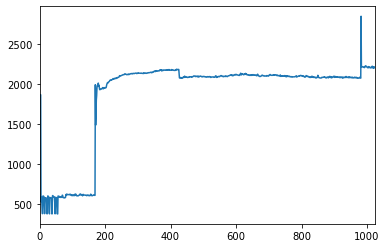

In [40]:
pd.Series(e[:1024]).plot()

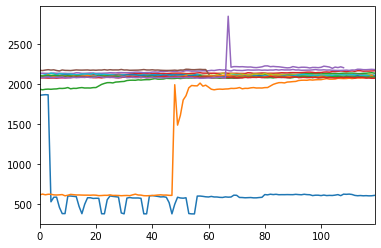

In [36]:
for x in loc:
    pd.Series(e[x-60:x+60]).plot()

<AxesSubplot:>

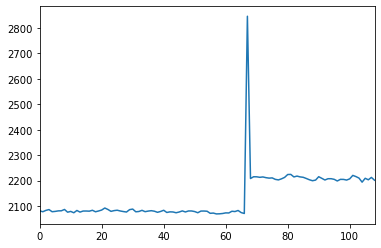

In [37]:
pd.Series(e[x-60:x+60]).plot()

<AxesSubplot:>

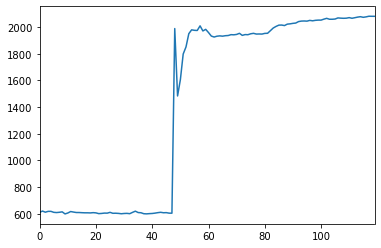

In [38]:
pd.Series(e[182-60:182+60]).plot()

<AxesSubplot:>

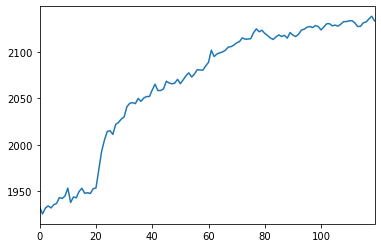

In [39]:
pd.Series(e[243-60:243+60]).plot()